In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import simplstyles
from voxelwise_tutorials.io import load_hdf5_array

from compare_variance_residual.fmri.results import get_result_path

In [2]:
plt.style.use('nord-light-talk')

In [3]:
low_level_feature = 'moten'

In [4]:
visual_vp = None
visual_rm = None

for subject in range(1, 5):
    mapper_path = os.path.join("../../data", 'mappers', f"subject{subject:02}_mappers.hdf")
    mapper = load_hdf5_array(mapper_path)
    if not mapper.keys().__contains__('roi_mask_V1'):
        continue

    v1_mask = mapper['roi_mask_V1']
    v2_mask = mapper['roi_mask_V2']
    v3_mask = mapper['roi_mask_V3']
    all_masks = v1_mask + v2_mask + v3_mask
    # set all values > 0 to 1
    all_masks[all_masks > 0] = 1
    all_masks = all_masks.astype(bool)

    result_path = get_result_path('reading', subject)
    vp_correlation = pd.read_csv(os.path.join(result_path, f"vp_english1000_{low_level_feature}_scores.csv"))[f'semantic\\{low_level_feature}']
    rm_correlaiton = pd.read_csv(os.path.join(result_path, f"residual_{low_level_feature}_english1000_scores.csv"))[
        'correlation_score']

    vp_correlation = vp_correlation[all_masks]
    rm_correlaiton = rm_correlaiton[all_masks]

    # extend array
    if visual_rm is not None:
        visual_vp = np.append(visual_vp, vp_correlation)
        visual_rm = np.append(visual_rm, rm_correlaiton)
    else:
        visual_vp = vp_correlation
        visual_rm = rm_correlaiton

In [5]:
visual_rm

array([ 0.16726123,  0.05207384,  0.08910891, ..., -0.05106281,
       -0.02265286,  0.01197874], shape=(4692,))

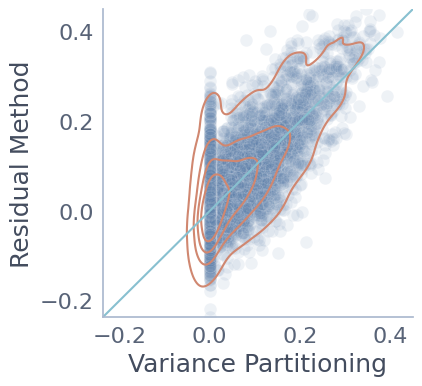

In [7]:
# sns.histplot(x=visual_vp, y=visual_rm, cmap='magma')
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.scatterplot(x=visual_vp, y=visual_rm, alpha=0.1)
sns.kdeplot(x=visual_vp, y=visual_rm, levels=5, color="C2")

plt.xlabel("Variance Partitioning")
plt.ylabel("Residual Method")

# sns.histplot(visual_data, x="Variance Partitioning", y="Residual Method", kde=True, cmap=cmap)
max_lims = max(visual_rm.max(), visual_vp.max())
min_lims = min(visual_rm.min(), visual_vp.min())
plt.xlim([min_lims, max_lims])
plt.ylim([min_lims, max_lims])
plt.plot([min_lims, max_lims], [min_lims, max_lims], color='C1')